<a href="https://colab.research.google.com/github/armandossrecife/piloto/blob/main/teste_piloto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importa módulos de dependências

In [1]:
!rm -rf promocity
!rm -rf accumulated*
!rm -rf dao.py
!rm -rf my_promocity.db
!rm -rf boxplot_com*
!rm -rf promocity_commits.csv
!rm -rf utils.py
!rm -rf requirements.txt

In [2]:
import utilidades

# 1. Carrega dependencias
utilidades.carrega_dependencias()

Teste de análise de repositorios
Faz o dowload das dependências...
Download do requirements.txt concluído com sucesso!
Download do dao.py concluído com sucesso!
Download do utils.py concluído com sucesso!
Dependências instaladas com sucesso!


In [3]:
import extracao

# extrai informacoes de commits e arquivos modificados em cada commmit
extracao.extrai_informacoes_repositorio(my_repositorio='https://github.com/armandossrecife/promocity.git')

Clona repositório promocity
Repositorio clonado com sucesso!
Cria a sessão de banco de dados
Cria as tabelas do banco
Tabelas criadas com sucesso!
Analisa commits e arquivos modificados. Aguarde...
Sessão de banco de dados fechada!
Quantidade de commits analisados: 91
Tempo de análise: 0:00:26.139899


In [55]:
!sudo apt install sqlite

Reading package lists... Done
Building dependency tree       
Reading state information... Done
sqlite is already the newest version (2.8.17-15fakesync1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [3]:
!sqlite3 my_promocity.db

SQLite version 3.31.1 2020-01-27 19:55:54
Enter ".help" for usage hints.
sqlite> .tables
commitscomplete  filescomplete  
sqlite> .exit


# Carrega DataFrames

## Chamada principal

In [120]:
import carrega_dataframes

banco = carrega_dataframes.DATA_BASE
df_commits_from_db, df_files_from_db, df_files_commits_from_db = carrega_dataframes.load_dataframes(database_name=banco)

## Consultas nos dataframes

In [121]:
# Faz alguns ajustes nos dataframes
df_files_from_db['modified_lines'] = df_files_from_db.added_lines + df_files_from_db.deleted_lines
df_files_commits_from_db['modified_lines'] = df_files_commits_from_db.file_added_lines + df_files_commits_from_db.file_deleted_lines

In [122]:
df_files_from_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  231 non-null    int64  
 1   name                231 non-null    object 
 2   hash                231 non-null    object 
 3   description         0 non-null      object 
 4   is_java             231 non-null    int64  
 5   created_date        231 non-null    object 
 6   old_path            147 non-null    object 
 7   new_path            225 non-null    object 
 8   filename            231 non-null    object 
 9   change_type         231 non-null    object 
 10  diff                231 non-null    object 
 11  diff_parsed         231 non-null    object 
 12  added_lines         231 non-null    int64  
 13  deleted_lines       231 non-null    int64  
 14  source_code         231 non-null    object 
 15  source_code_before  231 non-null    object 
 16  methods 

In [123]:
df_commits_from_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    91 non-null     int64  
 1   name                  91 non-null     object 
 2   hash                  91 non-null     object 
 3   msg                   91 non-null     object 
 4   author                91 non-null     object 
 5   committer             91 non-null     object 
 6   author_date           91 non-null     object 
 7   author_timezone       91 non-null     int64  
 8   committer_date        91 non-null     object 
 9   committer_timezone    91 non-null     int64  
 10  branches              91 non-null     object 
 11  in_main_branch        91 non-null     int64  
 12  merge                 91 non-null     int64  
 13  modified_files        91 non-null     object 
 14  parents               91 non-null     object 
 15  project_name          91 

In [124]:
# procura por um commit especifico
df_commits_from_db[['hash', 'modified_files']].query("hash == 'fc85e473f543f543c68110d62624180fc3b24606'")

,hash,modified_files
1,fc85e473f543f543c68110d62624180fc3b24606,"pom.xml,BackendApplication.java,GenericExcepti..."


In [125]:
# Lista todos os arquivos e seus commits
df_files_from_db[['name', 'hash']].sort_values('name')

,name,hash
60,AbstractModel.java,415fa2a5d1c5ce0351620b7418d223bbd7805f5c
100,AbstractModel.java,c14eddec7949328d89eeb2ebfc262d9905d15de2
64,AbstractService.java,415fa2a5d1c5ce0351620b7418d223bbd7805f5c
2,BackendApplication.java,fc85e473f543f543c68110d62624180fc3b24606
38,BackendApplication.java,507ade676867670ccfa22b214d6dc13af408c3a3
...,...,...
178,teste-promocity.sh,0e5e2ebd754dc63a2de0fa32f528426a9639b22f
192,teste-promocity.sh,a187c64ce6d4d69713ae2cd04ac5866c64d7d9ce
151,teste-promocity.sh,62dddb7e1c25ac14e9ef51bd361db047818145d3
179,teste.sh,0e5e2ebd754dc63a2de0fa32f528426a9639b22f


In [126]:
# Mostra as Complexidades Ciclomáticas dos arquivos
df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True)

,file_filename,file_complexity,author_date
60,AbstractModel.java,11.0,2018-11-02 16:57:10.000000
100,AbstractModel.java,11.0,2018-11-13 12:19:15.000000
64,AbstractService.java,7.0,2018-11-02 16:57:10.000000
2,BackendApplication.java,1.0,2018-10-31 00:40:14.000000
38,BackendApplication.java,1.0,2018-11-01 19:24:13.000000
...,...,...,...
162,teste-promocity.sh,NaN,2018-11-29 07:55:29.000000
178,teste-promocity.sh,NaN,2018-11-30 08:24:46.000000
192,teste-promocity.sh,NaN,2018-12-02 17:22:06.000000
179,teste.sh,NaN,2018-11-30 08:24:46.000000


In [127]:
# Mostra as complexidades ciclomáticas de um determinado arquivo
df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True).query("file_filename == 'UserController.java'")

,file_filename,file_complexity,author_date
8,UserController.java,6.0,2018-10-31 00:40:14.000000
34,UserController.java,6.0,2018-10-31 15:53:32.000000
45,UserController.java,7.0,2018-11-01 19:24:13.000000
59,UserController.java,8.0,2018-11-02 16:57:10.000000
99,UserController.java,12.0,2018-11-13 12:19:15.000000
116,UserController.java,14.0,2018-11-21 10:22:27.000000
119,UserController.java,16.0,2018-11-21 18:19:28.000000
120,UserController.java,16.0,2018-11-21 18:22:04.000000
122,UserController.java,20.0,2018-11-21 19:41:29.000000
129,UserController.java,21.0,2018-11-21 23:16:42.000000


In [128]:
df_commits_from_db.to_csv('promocity_commits.csv')

## Faz a análise das métricas e geração dos scatter plots

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Análise das Linhas modificadas (preparação da métrica AMLOC e CC)

In [130]:
# AMLOC de todos os arquivos
# retorna o df_amloc, df_boxplot_amloc e group_files_modified_lines
def get_accumulated_modified_locs(df_files_from_db):
  # Lista arquivos ordenados por nome com suas linhas modificadas
  df_files_from_db[['name','modified_lines']].sort_values(by=['name'], ascending=True)

  # Agrupa o df por nome do arquivo
  df_groupby_name_modified_lines = df_files_from_db[['name','modified_lines']].groupby('name')

  # Soma o total de linhas modificadas de cada arquivo
  group_files_modified_lines = df_groupby_name_modified_lines.sum()

  # Cria um novo df de Linhas de Código Modificadas
  df_locm = group_files_modified_lines.copy()
  df_locm = df_locm.reset_index()

  # Acrescenta uma coluna File
  df_locm['File'] = 'File'
  df_boxplot_em = df_locm[['modified_lines', 'File']]

  df_accumulated_modified_locs = df_locm.copy()
  return df_accumulated_modified_locs, df_boxplot_em, group_files_modified_lines

def gera_boxplot_accumulated_modified_locs(df_accumulated_modified_locs_boxplot):
  # Boxplot do EM (Esforço de Manutenção de Locs Modificadas). Todos os arquivos do repositório
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='modified_lines', data=df_accumulated_modified_locs_boxplot)
  plt.savefig('accumulated_modified_locs_boxplot.png')

# Remove os arquivos que nao foram modificados
# retorna o df_boxplot_amloc
def get_accumulated_modified_locs_boxplot_valid(df_boxplot_em):
  # Remove os arquivos que não foram modificados ao longo do tempo (O linhas modificadas)
  df_boxplot_em = df_boxplot_em.drop(df_boxplot_em[df_boxplot_em.modified_lines == 0].index)
  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em,  showfliers=False)
  plt.savefig('accumulated_modified_locs_boxplot_valid.png')
  return df_boxplot_em

# Cria um df_accumulated_modified_java_files contendo apenas arquivos .java
# df_accumulated_modified_java_files
def get_df_accumulated_modified_java_files(df_accumulated_modified_locs):
  # Cria um df sem os arquivos de Teste
  df_locm_no_test = df_accumulated_modified_locs[(df_accumulated_modified_locs["name"].str.contains('Test') == False)]
  # Cria um df contendo apenas os arquivos .java de implementacao
  df_locm_java_impl = df_locm_no_test[df_locm_no_test['name'].str.contains('.java', regex=False)]
  return df_locm_java_impl

# mostra o boxplot accumulated_modified_java_files
# retorna df_boxplot_em_java_impl contendo apenas arquivos .java
def show_boxplot_accumulated_modified_java_files(df_locm_java_impl):
  df_boxplot_em_java_impl = df_locm_java_impl[['modified_lines', 'File']]
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em_java_impl)
  plt.savefig('accumulated_modified_locs_boxplot_java_files.png')
  return df_boxplot_em_java_impl

# Calcula os quartiles de todos os arquivos referente a AMLOC
def get_quartiles_offiles_modified_lines(group_files_modified_lines, df_boxplot_em):
  list_of_files_modified_lines = group_files_modified_lines.to_dict()
  print(f'{ len(list_of_files_modified_lines) }, {list_of_files_modified_lines}')
  # Mostra os quatis
  em_q1 = np.percentile(df_boxplot_em.modified_lines, [25])
  em_q2 = np.percentile(df_boxplot_em.modified_lines, [50])
  em_q3 = np.percentile(df_boxplot_em.modified_lines, [75])
  em_q4 = np.percentile(df_boxplot_em.modified_lines, [100])
  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1}, Q2: {em_q2}, Q3: {em_q3}, Q4: {em_q4}')
  return em_q1, em_q2, em_q3, em_q4

# Seleciona apenas os AMLOC validos (arquivos que foram modificados pelo menos uma vez)
# retorna o df_boxplot_em_java_impl
def get_accumulated_modified_java_files_valid(df_boxplot_em_java_impl):
  # Remove os arquivos que não foram modificados ao longo do tempo (O linhas modificadas)
  df_boxplot_em_java_impl = df_boxplot_em_java_impl.drop(df_boxplot_em_java_impl[df_boxplot_em_java_impl.modified_lines == 0].index)

  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em_java_impl,  showfliers=False)
  plt.savefig('accumulated_modified_locs_boxplot_java_files_valid.png')
  return df_boxplot_em_java_impl

# Calcula os quartiles dos AMLOC .java validos
def get_quartiles_offiles_modified_lines_java_files_valid(df_boxplot_em_java_impl):
  # Mostra os quatis
  em_q1_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [25])
  em_q2_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [50])
  em_q3_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [75])
  em_q4_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [100])
  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_java_impl}, Q2: {em_q2_java_impl}, Q3: {em_q3_java_impl}, Q4: {em_q4_java_impl}')
  return em_q1_java_impl, em_q2_java_impl, em_q3_java_impl, em_q4_java_impl

# Cria um df de complexidade ciclomatica de todos os arquivos
# retorna df_cc_temp
def get_complexidade_ciclomatica(df_files_commits_from_db):
  # Mostra as Complexidades Ciclomáticas dos arquivos ordenada crescent pelo tempo
  df_cc = df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True)
  # Remove files that has not cc
  # cc all files
  df_cc_temp = df_cc.copy()
  df_cc_temp = df_cc_temp[df_cc_temp.file_complexity.notnull()]
  return df_cc_temp

##### Todos os arquivos #####
# gera um boxplot da complexidade ciclomatica de todos os arquivos
def get_boxplot_complexidade_ciclomatica(df_cc_temp):
  df_cc_temp['File'] = 'File'
  df_boxplot_cc_temp = df_cc_temp[['file_complexity', 'File']]
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='file_complexity', data=df_boxplot_cc_temp)
  plt.savefig('boxplot_complexidade_ciclomatica.png')
  return df_cc_temp, df_boxplot_cc_temp

# Calcula os quartiles das complexidades ciclomaticas
# retorna os quartiles
def get_quartiles_complexidade_ciclomatica(df_boxplot_cc_temp):
  # Mostra os quatis
  em_q1_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [25])
  em_q2_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [50])
  em_q3_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [75])
  em_q4_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [100])

  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_cc_temp}, Q2: {em_q2_cc_temp}, Q3: {em_q3_cc_temp}, Q4: {em_q4_cc_temp}')
  return em_q1_cc_temp, em_q2_cc_temp, em_q3_cc_temp, em_q4_cc_temp

### Apenas os arquivos .java ###
# gera um boxplot de complexidade ciclomatica apenas dos arquivos .java
def get_boxplot_complexidade_ciclomatica_only_java(df_cc_temp):
  # Cria um df sem os arquivos de Teste
  df_cc_temp_no_test = df_cc_temp[(df_cc_temp["file_filename"].str.contains('Test') == False)]
  # Cria um df contendo apenas os arquivos .java de implementacao
  df_cc_temp_java_impl = df_cc_temp_no_test[df_cc_temp_no_test['file_filename'].str.contains('.java', regex=False)]
  df_cc_temp_boxplot_em_java_impl = df_cc_temp_java_impl[['file_complexity', 'File']]

  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='file_complexity', data=df_cc_temp_boxplot_em_java_impl)
  plt.savefig('boxplot_complexidade_ciclomatica_only_java.png')
  return df_cc_temp_java_impl, df_cc_temp_boxplot_em_java_impl

# calcula os quatiles das complexidade ciclomaticas apenas dos arquivos .java
# retorna os quartiles
def get_quartiles_complexidade_ciclomatica_java_impl(df_cc_temp_boxplot_em_java_impl):
  em_q1_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [25])
  em_q2_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [50])
  em_q3_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [75])
  em_q4_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [100])
  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_cc_temp_java_impl}, Q2: {em_q2_cc_temp_java_impl}, Q3: {em_q3_cc_temp_java_impl}, Q4: {em_q4_cc_temp_java_impl}')
  return em_q1_cc_temp_java_impl, em_q2_cc_temp_java_impl, em_q3_cc_temp_java_impl, em_q4_cc_temp_java_impl

### Testa as métricas de AMLOC e scatter plots

In [131]:
df_accumulated_modified_locs, df_accumulated_modified_locs_boxplot, group_files_modified_lines = get_accumulated_modified_locs(df_files_from_db)

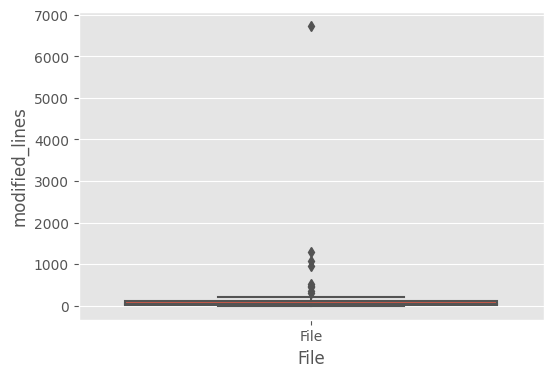

In [132]:
gera_boxplot_accumulated_modified_locs(df_accumulated_modified_locs_boxplot)

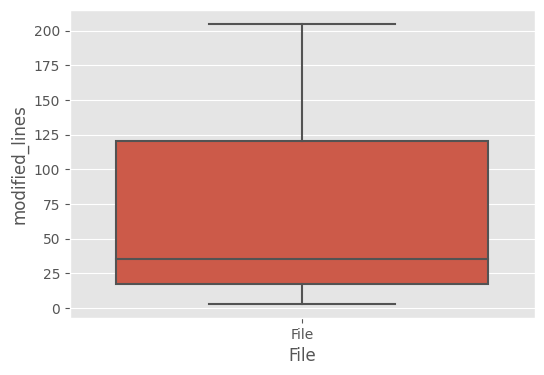

In [133]:
df_accumulated_modified_locs_boxplot_validos = get_accumulated_modified_locs_boxplot_valid(df_accumulated_modified_locs_boxplot)

In [134]:
em_q1, em_q2, em_q3, em_q4 = get_quartiles_offiles_modified_lines(group_files_modified_lines,df_accumulated_modified_locs_boxplot_validos)

1, {'modified_lines': {'AbstractModel.java': 55, 'AbstractService.java': 57, 'BackendApplication.java': 23, 'BackendApplicationTests.java': 18, 'Book.java': 112, 'BookController.java': 100, 'BookNotFoundException.java': 23, 'BookService.java': 94, 'Category.java': 10, 'Coupon.java': 181, 'CouponController.java': 203, 'CouponNotFoundException.java': 14, 'CouponService.java': 176, 'CouponsRepository.java': 11, 'CouponsSent.java': 74, 'CouponsService.java': 29, 'Diagrama de Classes Servicos Promocity.asta': 0, 'Diagrama de Classes Servicos Promocity.png': 0, 'GPSPoint.java': 38, 'GenericExceptionMapper.java': 20, 'GeographicArea.java': 93, 'GeradorSenha.java': 33, 'ICouponService.java': 13, 'IPromotionService.java': 13, 'IStoreService.java': 13, 'IUserService.java': 27, 'JerseyConfiguration.java': 54, 'LICENSE': 27, 'LocationStore.java': 79, 'ManipuladorDatas.java': 27, 'Message.java': 20, 'Messenger.java': 31, 'MyStores.java': 34, 'MyStoresRepository.java': 12, 'MyStoresService.java': 26

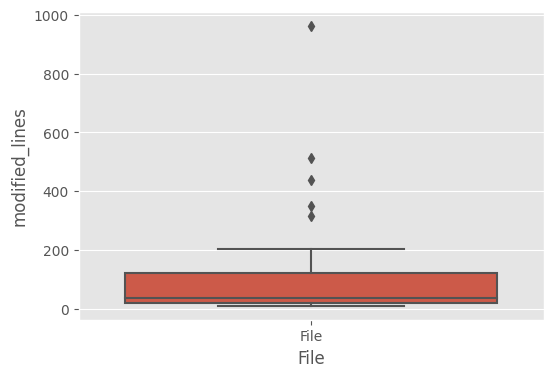

In [135]:
df_locm_java_impl = get_df_accumulated_modified_java_files(df_accumulated_modified_locs)
df_boxplot_em_java_impl = show_boxplot_accumulated_modified_java_files(df_locm_java_impl)

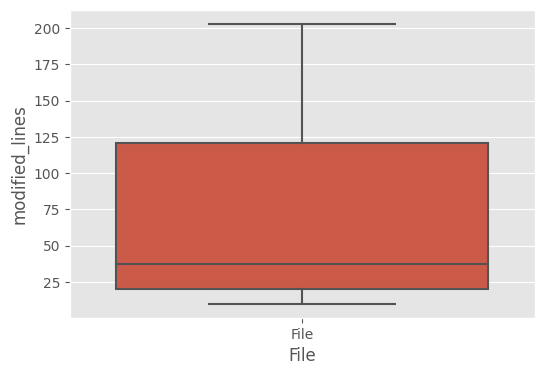

In [136]:
df_boxplot_em_java_impl_valid = get_accumulated_modified_java_files_valid(df_boxplot_em_java_impl)

In [137]:
em_q1_java_impl, em_q2_java_impl, em_q3_java_impl, em_q4_java_impl = get_quartiles_offiles_modified_lines_java_files_valid(df_boxplot_em_java_impl_valid)

Quartis do Total de Linhas Modificadas: Q1: [20.], Q2: [37.5], Q3: [120.75], Q4: [963.]


### Testa as métricas de complexidade ciclomática

In [138]:
df_complexidade_ciclomatica = get_complexidade_ciclomatica(df_files_commits_from_db)
df_complexidade_ciclomatica

,file_filename,file_complexity,author_date
60,AbstractModel.java,11.0,2018-11-02 16:57:10.000000
100,AbstractModel.java,11.0,2018-11-13 12:19:15.000000
64,AbstractService.java,7.0,2018-11-02 16:57:10.000000
2,BackendApplication.java,1.0,2018-10-31 00:40:14.000000
38,BackendApplication.java,1.0,2018-11-01 19:24:13.000000
...,...,...,...
123,UsersRepository.java,0.0,2018-11-21 19:41:29.000000
66,UsersService.java,1.0,2018-11-02 16:57:10.000000
125,UsersService.java,3.0,2018-11-21 19:41:29.000000
124,WebSecurityConfig.java,1.0,2018-11-21 19:41:29.000000


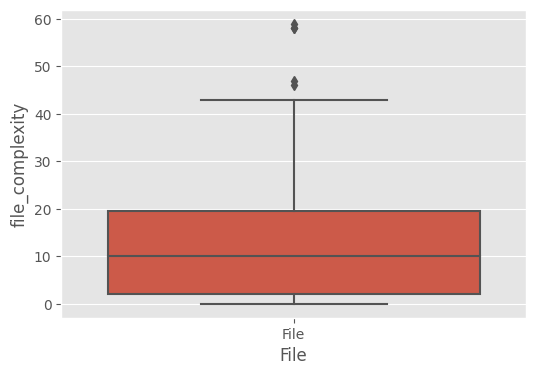

In [139]:
df_cc_temp,df_boxplot_cc_temp = get_boxplot_complexidade_ciclomatica(df_complexidade_ciclomatica)

In [140]:
em_q1_cc_temp,em_q2_cc_temp, em_q3_cc_temp, em_q4_cc_temp = get_quartiles_complexidade_ciclomatica(df_boxplot_cc_temp)

Quartis do Total de Linhas Modificadas: Q1: [2.], Q2: [10.], Q3: [19.5], Q4: [59.]


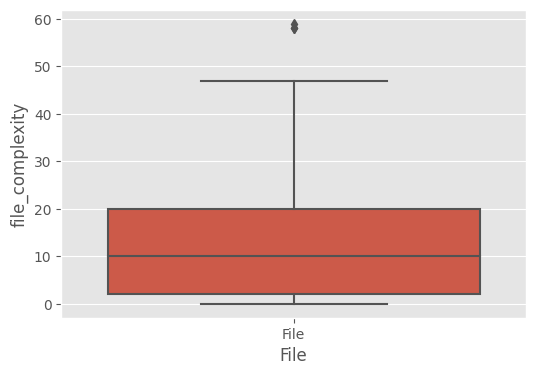

In [141]:
df_cc_temp_java_impl, df_cc_temp_boxplot_em_java_impl = get_boxplot_complexidade_ciclomatica_only_java(df_cc_temp)

In [142]:
em_q1_cc_temp_java_impl, em_q2_cc_temp_java_impl, em_q3_cc_temp_java_impl, em_q4_cc_temp_java_impl= get_quartiles_complexidade_ciclomatica_java_impl(df_cc_temp_boxplot_em_java_impl)

Quartis do Total de Linhas Modificadas: Q1: [2.], Q2: [10.], Q3: [20.], Q4: [59.]


## Cálculo do FOC e geração da relação AMLOCxFOC

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
def calcula_frequencia_commits(df_files_from_db):
  # calcula frequência dos arquivos na faixa de commits analisados
  list_of_files_frequency_in_commits = {}

  # Dataframe agrupados por arquivos e seus commits
  df_groupby_name = df_files_from_db[['name', 'hash']].groupby('name')

  print(f'Quantidade de grupos: {df_groupby_name.ngroups}')
  print(f'Grupos: {df_groupby_name.groups}')

  group_files = df_groupby_name.size()
  print(group_files)
  print('')
  list_of_files_frequency_in_commits = group_files.to_dict()
  print(f'{ len(list_of_files_frequency_in_commits) }, {list_of_files_frequency_in_commits}')

  # Cria um df contendo o arquivo e sua frequencia de commits
  df_fc = pd.DataFrame({'name':group_files.index, 'frequency_commits': group_files.values})

  df_boxplot_fc = df_fc
  # Acrescenta a coluna File
  df_boxplot_fc['File'] = 'File'
  return df_fc, df_boxplot_fc

def gera_boxplot_frequencia_commits(df_boxplot_fc):
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc)
  plt.figure(figsize=(6,4))
  plt.savefig('boxplot_frequencia_commmits.png')
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc, showfliers=False)
  plt.savefig('boxplot_frequencia_commmits_no_outliers.png')

def calcula_quartiles_frequencia_commits(df_boxplot_fc):
  fc_q1 = np.percentile(df_boxplot_fc.frequency_commits , [25])
  fc_q2 = np.percentile(df_boxplot_fc.frequency_commits , [50])
  fc_q3 = np.percentile(df_boxplot_fc.frequency_commits , [75])
  fc_q4 = np.percentile(df_boxplot_fc.frequency_commits , [100])

  print(f'Quartis da Frequencia de Commits Q1: {fc_q1}, Q2: {fc_q2}, Q3: {fc_q3}, Q4: {fc_q4}')
  return fc_q1, fc_q2, fc_q3, fc_q4

def gera_boxplot_frequencia_commits_only_java(df_fc):
  # Cria um df sem os arquivos de Teste
  df_fc_no_test = df_fc[(df_fc["name"].str.contains('Test') == False)]

  # Cria um df contendo apenas os arquivos .java de implementacao
  df_fc_java_impl = df_fc_no_test[df_fc_no_test['name'].str.contains('.java', regex=False)]

  df_boxplot_fc_java_impl = df_fc_java_impl[['frequency_commits', 'File']]

  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl)
  plt.savefig('boxplot_frequencia_commmits_only_java.png')

  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl, showfliers=False)
  plt.savefig('boxplot_frequencia_commmits_only_java_no_outliers.png')

  # Remove as frequencias muito baixas (total de commits < 3)
  df_boxplot_fc_java_impl2 = df_boxplot_fc_java_impl.drop(df_boxplot_fc_java_impl[df_boxplot_fc_java_impl.frequency_commits < 3].index)
  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl2, showfliers=False)
  plt.savefig('boxplot_frequencia_commmits_only_java_no_outliers_less_3.png')
  return df_fc_java_impl, df_boxplot_fc_java_impl, df_boxplot_fc_java_impl2

def calcula_quartiles_frequencia_commmits_java_impl(df_fc_java_impl):
  fc_q1_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [25])
  fc_q2_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [50])
  fc_q3_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [75])
  fc_q4_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [100])
  print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')
  return fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl

def calcula_quartiles_frequencia_commmits_no_outliers(df_boxplot_fc_java_impl):
  fc_q1_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [25])
  fc_q2_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [50])
  fc_q3_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [75])
  fc_q4_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [100])
  print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')
  return fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl

def calcula_quartiles_frequencia_commmits_no_outliers_less_3(df_boxplot_fc_java_impl2):
  fc_q1_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [25])
  fc_q2_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [50])
  fc_q3_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [75])
  fc_q4_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [100])
  print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')
  return fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl

def gera_df_foc_amloc(df_accumulated_modified_locs):
  df_em_fc = df_accumulated_modified_locs[['name','modified_lines']]
  df_em_fc['frequency_commits'] = df_fc['frequency_commits']
  return df_em_fc

def gera_df_fator_foc_amloc(df_em_fc):
  df_fator_multiplicacao = df_em_fc.copy()
  df_fator_multiplicacao['factor1'] = df_fator_multiplicacao['modified_lines'] * df_fator_multiplicacao['frequency_commits']
  return df_fator_multiplicacao

def gera_scatter_plot_foc_amloc(df_em_fc):
  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc, x='modified_lines', y='frequency_commits')
  abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}
  plt.title(f"Análise do Repositório Promocity : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in range(df_em_fc.shape[0]):
    if df_em_fc.modified_lines[i] > em_q3 and df_em_fc.frequency_commits[i] > fc_q3:
      plt.text(df_em_fc.modified_lines[i], y=df_em_fc.frequency_commits[i], s=df_em_fc.name[i], alpha=0.8, fontsize=8)
  plt.savefig('scatter_plot_foc_amloc.png')
  plt.show()

def gera_scatter_plot_foc_amloc(df_em_fc):
  # Cria um df sem os arquivos de Teste
  df_em_fc_no_test = df_em_fc[(df_em_fc["name"].str.contains('Test') == False)]
  # Cria um df contendo apenas os arquivos .java de implementacao
  df_em_fc_java_impl = df_em_fc_no_test[df_em_fc_no_test['name'].str.contains('.java', regex=False)]

  df_fator_multiplicacao_em_fc_java_impl = df_em_fc_java_impl.copy()
  df_fator_multiplicacao_em_fc_java_impl['factor1'] = df_fator_multiplicacao_em_fc_java_impl['modified_lines'] * df_fator_multiplicacao_em_fc_java_impl['frequency_commits']

  s = df_fator_multiplicacao_em_fc_java_impl.copy()

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')
  abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}
  plt.title(f"Análise do Repositório Promocity : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])
  plt.savefig('scatter_plot_foc_amloc_only_java.png')
  plt.show()
  return df_em_fc_java_impl, df_fator_multiplicacao_em_fc_java_impl

def gera_scatter_plot_foc_amloc_com_quadrantes(df_em_fc_java_impl):
  lista_temp_index_modified_lines = []
  for items in df_em_fc_java_impl.modified_lines.items():
    lista_temp_index_modified_lines.append((items[0], items[1]))

  list_initial_critical_files_from_sp = []

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')
  abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}
  plt.title(f"Análise do Repositório Promocity : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in lista_temp_index_modified_lines:
    if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl:
        plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)
        list_initial_critical_files_from_sp.append( (df_em_fc_java_impl.name[i[0]], df_em_fc_java_impl.modified_lines[i[0]], df_em_fc_java_impl.frequency_commits[i[0]]) )

  #Mean values
  plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1)
  plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)

  #Quadrant Marker
  plt.text(x=500, y=10, s="Q1",alpha=0.8,fontsize=12, color='b')
  plt.text(x=500, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=10, s="Q2", alpha=0.8,fontsize=12, color='b')
  plt.savefig('scatter_plot_foc_amloc_only_java_com_quadrantes.png')
  plt.show()
  return list_initial_critical_files_from_sp

def gera_scatter_plot_final_foc_amloc_com_quadrantes(list_initial_critical_files_from_sp, df_em_fc_java_impl, em_q3_java_impl, fc_q3_java_impl):
  for item in list_initial_critical_files_from_sp:
    print(item)
  # Pego da secao de analise de Architectural Smells
  # selecao de classes criticas que pertencem ao Q1 (quadrante1) -> Modified LOC ALTA e Frequencia de Commits Alta
  my_temp_lista_arquivos_criticos = [('StoreController.java', 439, 11), ('UserController.java', 963, 22), ('UserLocationMonitoring.java', 316, 11), ('Users.java', 350, 11)]

  my_temp_lista_arquivos_criticos_names = []
  for i in range(0,  len(my_temp_lista_arquivos_criticos)):
    my_temp_lista_arquivos_criticos_names.append(my_temp_lista_arquivos_criticos[i][0])

  lista_temp_index_modified_lines = []
  for items in df_em_fc_java_impl.modified_lines.items():
    lista_temp_index_modified_lines.append((items[0], items[1]))

  list_critical_files = []

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')

  abbr={'titulo':'LOCs Modifications x Files Occurrence in Commits', 'modified_lines':'LOCs Modifications', 'frequency_commits':'Files Occurrence in Commits'}

  plt.title(f"Analysis of Promocity Repository : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in lista_temp_index_modified_lines:
    if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl:
      if df_em_fc_java_impl.name[i[0]] in my_temp_lista_arquivos_criticos_names:
        plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)
        list_critical_files.append( (df_em_fc_java_impl.name[i[0]], df_em_fc_java_impl.modified_lines[i[0]], df_em_fc_java_impl.frequency_commits[i[0]]) )

  #Mean values
  plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1)
  plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)

  #Quadrant Marker
  plt.text(x=500, y=10, s="Q1",alpha=0.8,fontsize=12, color='b')
  plt.text(x=500, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=10, s="Q2", alpha=0.8,fontsize=12, color='b')

  plt.savefig('scatter_plot_mloc_foc_final_java_com_quadrantes.png')
  plt.show()
  return list_critical_files

In [35]:
df_files_from_db[['name', 'hash']].query("name=='.gitignore'")

,name,hash


In [145]:
df_fc, df_boxplot_fc = calcula_frequencia_commits(df_files_from_db)

Quantidade de grupos: 91
Grupos: {'AbstractModel.java': [60, 100], 'AbstractService.java': [64], 'BackendApplication.java': [2, 38], 'BackendApplicationTests.java': [30, 224], 'Book.java': [9], 'BookController.java': [6], 'BookNotFoundException.java': [20], 'BookService.java': [15], 'Category.java': [10], 'Coupon.java': [11, 46, 73, 130, 132, 155, 161, 174], 'CouponController.java': [71, 194], 'CouponNotFoundException.java': [21], 'CouponService.java': [16, 76], 'CouponsRepository.java': [75], 'CouponsSent.java': [40, 55], 'CouponsService.java': [77], 'Diagrama de Classes Servicos Promocity.asta': [187], 'Diagrama de Classes Servicos Promocity.png': [188], 'GPSPoint.java': [52], 'GenericExceptionMapper.java': [3], 'GeographicArea.java': [53, 68], 'GeradorSenha.java': [126], 'ICouponService.java': [25], 'IPromotionService.java': [26], 'IStoreService.java': [27], 'IUserService.java': [28, 67], 'JerseyConfiguration.java': [4, 39, 70, 83, 97, 111], 'LICENSE': [226], 'LocationStore.java': [

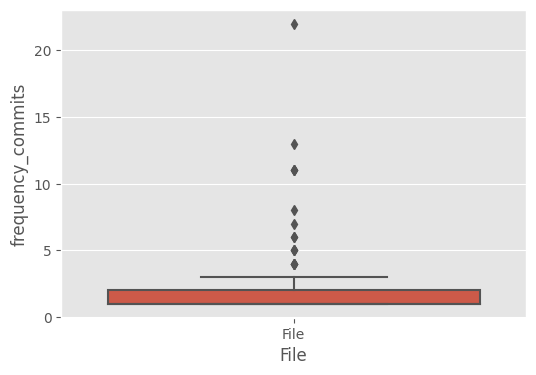

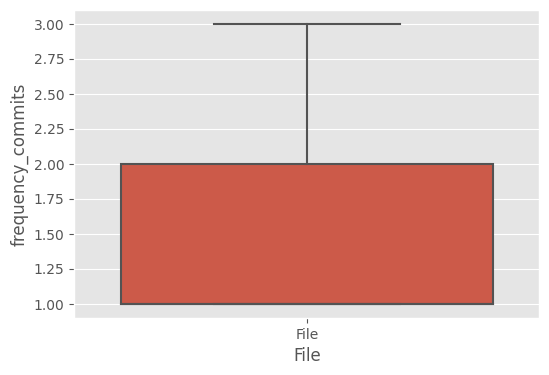

In [146]:
gera_boxplot_frequencia_commits(df_boxplot_fc)

In [147]:
fc_q1,fc_q2, fc_q3, fc_q4 = calcula_quartiles_frequencia_commits(df_boxplot_fc)

Quartis da Frequencia de Commits Q1: [1.], Q2: [1.], Q3: [2.], Q4: [22.]


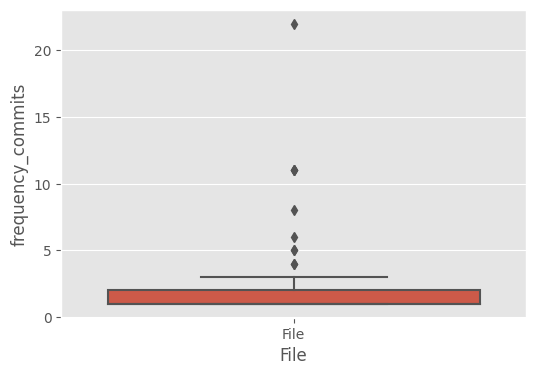

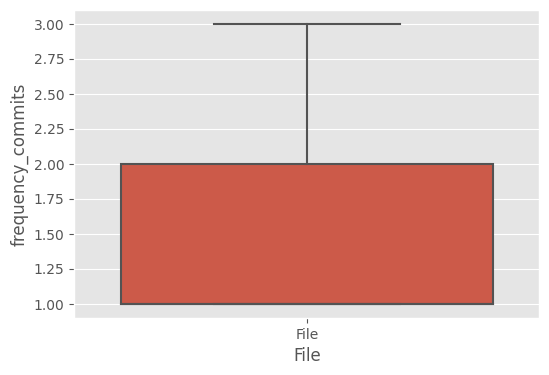

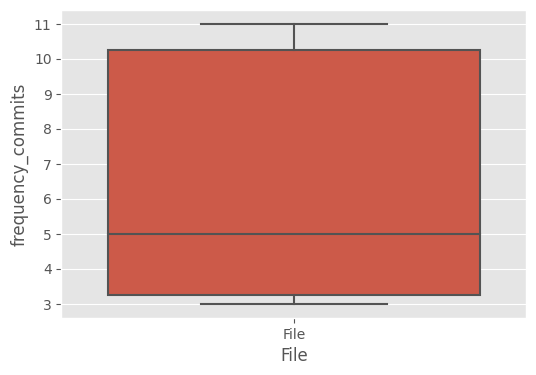

In [148]:
df_fc_java_impl, df_boxplot_fc_java_impl, df_boxplot_fc_java_impl2 = gera_boxplot_frequencia_commits_only_java(df_fc)

In [149]:
fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl = calcula_quartiles_frequencia_commmits_no_outliers_less_3(df_boxplot_fc_java_impl2)

Quartis da Frequencia de Commits Q1: [3.25], Q2: [5.], Q3: [10.25], Q4: [22.]


In [150]:
df_em_fc = gera_df_foc_amloc(df_accumulated_modified_locs)
df_em_fc

,name,modified_lines,frequency_commits
0,AbstractModel.java,55,2
1,AbstractService.java,57,1
2,BackendApplication.java,23,2
3,BackendApplicationTests.java,18,2
4,Book.java,112,1
...,...,...,...
86,swagger-5.yaml,1080,1
87,swagger.yaml,1286,2
88,teste-promocity.sh,44,6
89,teste.sh,12,1


In [151]:
df_fator_multiplicacao = gera_df_fator_foc_amloc(df_em_fc)
df_fator_multiplicacao

,name,modified_lines,frequency_commits,factor1
0,AbstractModel.java,55,2,110
1,AbstractService.java,57,1,57
2,BackendApplication.java,23,2,46
3,BackendApplicationTests.java,18,2,36
4,Book.java,112,1,112
...,...,...,...,...
86,swagger-5.yaml,1080,1,1080
87,swagger.yaml,1286,2,2572
88,teste-promocity.sh,44,6,264
89,teste.sh,12,1,12


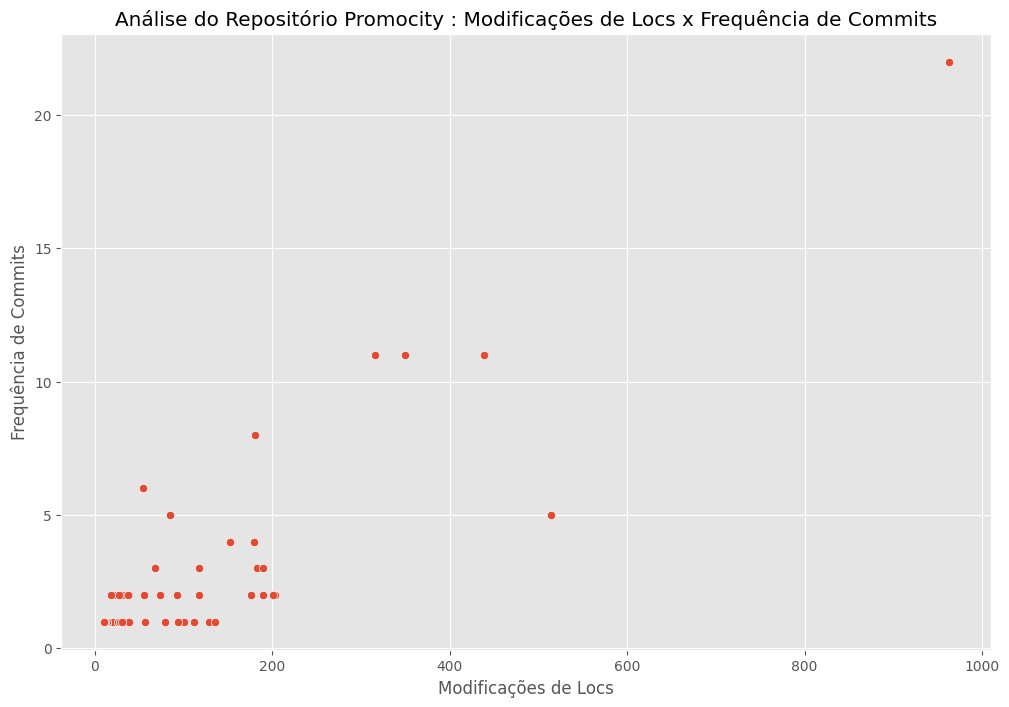

In [153]:
df_em_fc_java_impl, df_fator_multiplicacao_em_fc_java_impl = gera_scatter_plot_foc_amloc(df_em_fc)

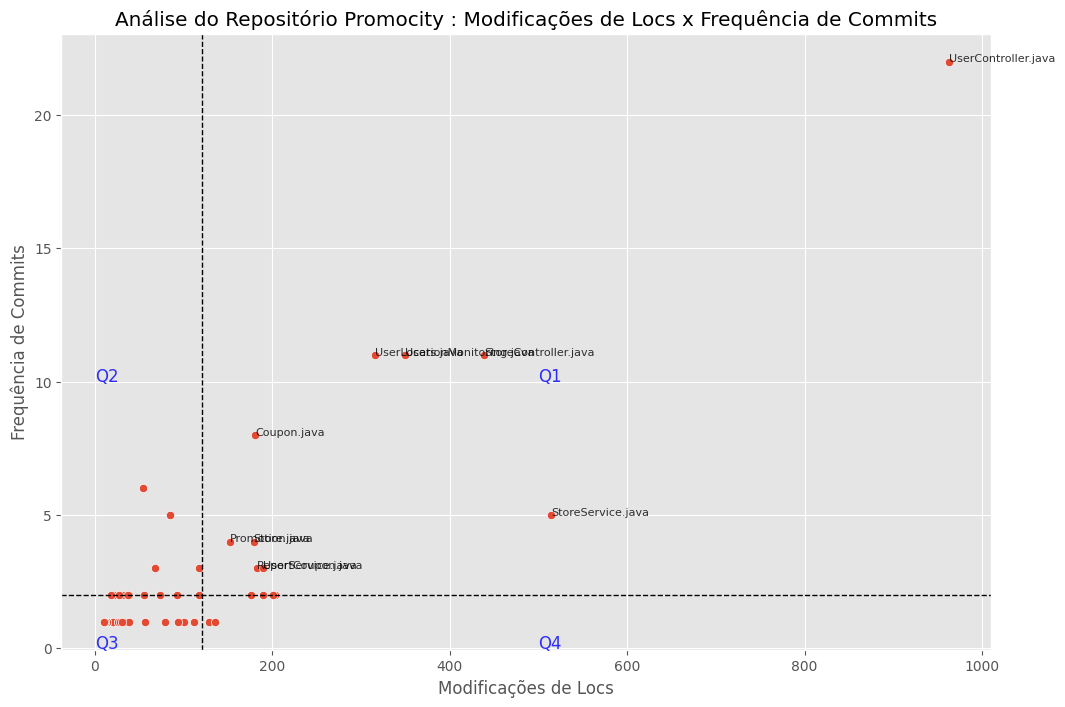

In [174]:
list_initial_critical_files_from_sp = gera_scatter_plot_foc_amloc_com_quadrantes(df_em_fc_java_impl)

In [175]:
list_initial_critical_files_from_sp

[('Coupon.java', 181, 8),
 ('Promotion.java', 152, 4),
 ('ReportCoupon.java', 183, 3),
 ('Store.java', 179, 4),
 ('StoreController.java', 439, 11),
 ('StoreService.java', 514, 5),
 ('UserController.java', 963, 22),
 ('UserLocationMonitoring.java', 316, 11),
 ('UserService.java', 190, 3),
 ('Users.java', 350, 11)]

('Coupon.java', 181, 8)
('Promotion.java', 152, 4)
('ReportCoupon.java', 183, 3)
('Store.java', 179, 4)
('StoreController.java', 439, 11)
('StoreService.java', 514, 5)
('UserController.java', 963, 22)
('UserLocationMonitoring.java', 316, 11)
('UserService.java', 190, 3)
('Users.java', 350, 11)


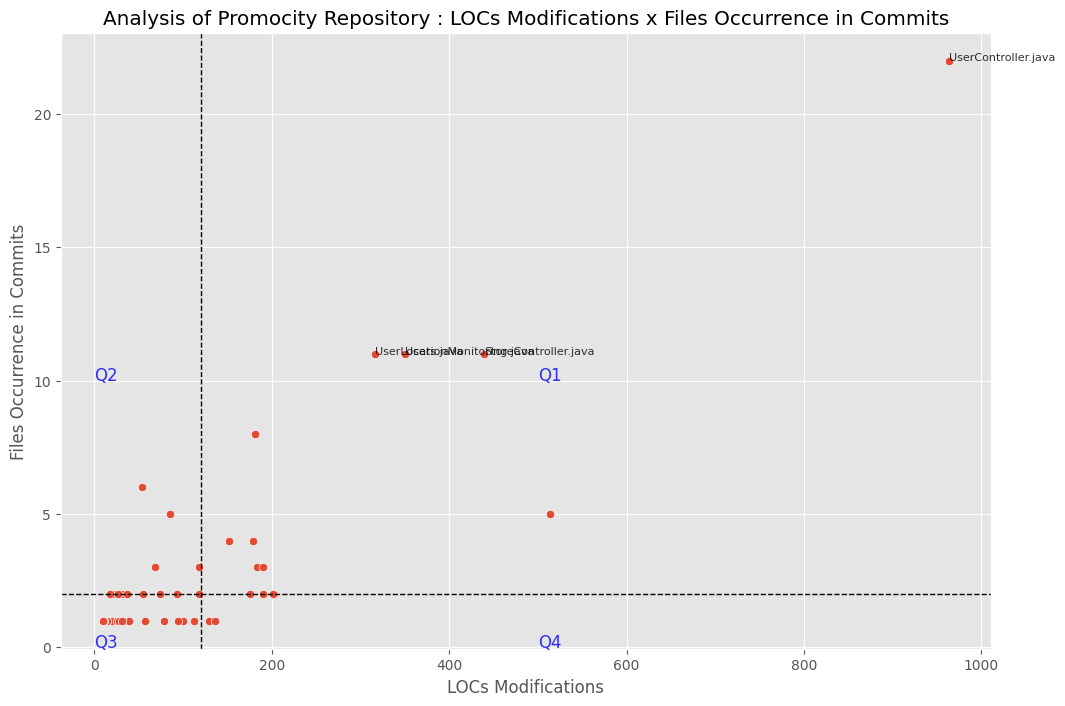

In [176]:
list_critical_files = gera_scatter_plot_final_foc_amloc_com_quadrantes(list_initial_critical_files_from_sp, df_em_fc_java_impl, em_q3_java_impl, fc_q3_java_impl)

In [177]:
list_critical_files

[('StoreController.java', 439, 11),
 ('UserController.java', 963, 22),
 ('UserLocationMonitoring.java', 316, 11),
 ('Users.java', 350, 11)]

## Gera e analisa dependências entre os arquivos